# Turing pattern using FDM.
Script is based on this webpage: https://blogs.mathworks.com/graphics/2015/03/16/how-the-tiger-got-its-stripes/

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import time

In [2]:
# periodic boundary condition laplacian FD scheme
def my_laplacian(in_M):
    out = -4*in_M + (np.roll(in_M,1,axis=1) + np.roll(in_M,-1,axis=1) + np.roll(in_M,1,axis=0) + np.roll(in_M,-1,axis=0))

    return out

In [3]:
# model parameters
da      =  1/4.0   # diffusion A - there is factor four between the matlab script and standard FD Laplace implementation
db      = .5/4.0  # diffusion B
f       = .055 # feed rate
k       = .062 # kill rate

In [4]:
# Mesh and initial conditions
nx      = 128
A       = np.ones((nx,nx))
B       = np.zeros((nx,nx))
B[np.ix_(np.arange(50,61),np.arange(50,71))] = 1
B[np.ix_(np.arange(60,81),np.arange(70,81))] = 1
Anew    = A.copy()
Bnew    = B.copy()
x = np.linspace(0, 127, nx)
y = np.linspace(0, 127, nx)
xv, yv = np.meshgrid(x, y)

In [5]:
# time stepping
dt      = .25
tottime = 4000
nt      = int(tottime/dt)
t       = 0

In [6]:
# hide
# solver
def turing_solve(A, B):
    Anew = A + (da*my_laplacian(A) - A*np.square(B) + f*(1-A))*dt
    Bnew = B + (db*my_laplacian(B) + A*np.square(B) - (k+f)*B)*dt
    
    return Anew,Bnew

In [7]:
# solver
#def turing_solve(A, B):
#    Anew =???
#    Bnew = ???
    
#    return Anew,Bnew

In [10]:
# based on this solution: https://stackoverflow.com/questions/42386372/increase-the-speed-of-redrawing-contour-plot-in-matplotlib/42398244#42398244
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,5))
ax  = plt.axes(xlim=(0, nx), ylim=(0, nx))

timeLabel=ax.text(0.02,0.98,'Time: ',transform=ax.transAxes,va='top')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cmap=plt.cm.gist_yarg
p = [ax.contour(xv,yv,B, cmap=cmap ) ]
#t = np.ones(nt)*time.time()

skipf = 20

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    timeLabel._text='Time: %.1f'%((i*skipf)*dt)
    
    # use global keyword to store the latest solution
    global Anew, Bnew

    #for tp in p[0].collections:
    #    tp.remove()
    p[0] = ax.contourf(xv,yv,Bnew, cmap= cmap) 
    
    #t[1:] = t[0:-1]
    #t[0] = time.time()

    # the movie file gets too large if we save every time step, so we always skip 10    
    for it in range(0,skipf):
        Anew,Bnew=turing_solve(Anew, Bnew)

    return p[0].collections+[timeLabel]
    

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=int(nt/skipf), interval=30, repeat=False, blit=True)
plt.close(anim._fig)

# Call function to display the animation
#HTML(anim.to_html5_video())  # lower resolution
HTML(anim.to_jshtml())  # higher resolution

KeyboardInterrupt: 

In [9]:
p

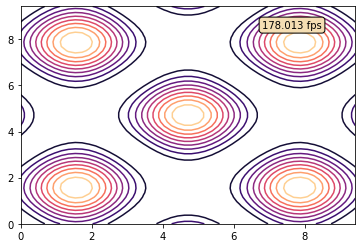

In [12]:

#Here is an example on how to use a contour plot in an animation. It uses matplotlib.animation.FuncAnimation which makes it easy to turn blitting on and off. With blit=True it runs at ~64 fps on my machine, without blitting ~55 fps. Note that the interval must of course allow for the fast animation; setting it to interval=10 (milliseconds) would allow for up to 100 fps, but the drawing time limits it to something slower than that.

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import time

x= np.linspace(0,3*np.pi)
X,Y = np.meshgrid(x,x)
f = lambda x,y, alpha, beta :(np.sin(X+alpha)+np.sin(Y*(1+np.sin(beta)*.4)+alpha))**2
alpha=np.linspace(0, 2*np.pi, num=34)
levels= 10
cmap=plt.cm.magma


fig, ax=plt.subplots()
props = dict(boxstyle='round', facecolor='wheat')
timelabel = ax.text(0.9,0.9, "", transform=ax.transAxes, ha="right", bbox=props)
t = np.ones(10)*time.time()
p = [ax.contour(X,Y,f(X,Y,0,0), levels, cmap=cmap ) ]

def update(i):
    for tp in p[0].collections:
        tp.remove()
    p[0] = ax.contour(X,Y,f(X,Y,alpha[i],alpha[i]), levels, cmap= cmap) 
    t[1:] = t[0:-1]
    t[0] = time.time()
    timelabel.set_text("{:.3f} fps".format(-1./np.diff(t).mean()))  
    return p[0].collections+[timelabel]

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(alpha), 
                                         interval=10, blit=True, repeat=True)
plt.show()

In [13]:
t

array([1.66913509e+09, 1.66913509e+09, 1.66913509e+09, 1.66913509e+09,
       1.66913509e+09, 1.66913509e+09, 1.66913509e+09, 1.66913509e+09,
       1.66913509e+09, 1.66913509e+09])